In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
import numpy as np
import hvplot.pandas
import panel as pn
from panel.interact import interact
import os
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [2]:
Path.cwd()

PosixPath('/Users/michana/CU-NYC-FIN-PT-08-2019-U-C')

In [3]:
csvpath = Path("../CU-NYC-FIN-PT-08-2019-U-C/Felonies.csv")

In [4]:
Felony_data = pd.read_csv(csvpath)
Felony_data.head()

PCT                                              CRIME   2000   2001  \
0    1  MURDER & NON NEGL. MANSLAUGHTER               ...    3.0    1.0   
1  NaN             RAPE                                     12.0    5.0   
2  NaN             ROBBERY                                 252.0  188.0   
3  NaN             FELONY ASSAULT                          139.0  164.0   
4  NaN             BURGLARY                                475.0  437.0   

    2002   2003   2004   2005   2006   2007  ...   2009   2010   2011   2012  \
0    2.0    2.0    2.0    0.0    1.0    0.0  ...    2.0    2.0    0.0    1.0   
1   10.0   11.0   11.0    5.0    4.0    7.0  ...    4.0    6.0   13.0   10.0   
2  210.0  164.0  154.0  172.0  119.0  128.0  ...  106.0   96.0  102.0   81.0   
3  147.0  134.0  129.0  121.0   94.0   90.0  ...   83.0   68.0   94.0  110.0   
4  297.0  403.0  246.0  293.0  255.0  231.0  ...  207.0  170.0  155.0  188.0   

    2013   2014   2015   2016  2017  2018  
0    0.0    0.0    1.0    0.0   9.0   1.0  
1   12.0    8.0    7.0    9.0  18.0  23.0  
2   68.0   50.0   79.0   60.0  69.0  80.0  
3   87.0   76.0   86.0   78.0  91.0  61.0  
4  171.0  145.0  138.0  117.0  65.0  85.0  

[5 rows x 21 columns]

In [5]:
Felony_data.dtypes.head()

PCT       object
CRIME     object
2000     float64
2001     float64
2002     float64
dtype: object

In [6]:
Felony_data['PCT'].astype(str)

0        1
1      nan
2      nan
3      nan
4      nan
      ... 
631    nan
632    nan
633    nan
634    nan
635    nan
Name: PCT, Length: 636, dtype: object

In [7]:
df= Felony_data
df["PCT"].fillna(method='ffill',inplace=True)
df.fillna(0).head()

PCT                                              CRIME   2000   2001   2002  \
0   1  MURDER & NON NEGL. MANSLAUGHTER               ...    3.0    1.0    2.0   
1   1             RAPE                                     12.0    5.0   10.0   
2   1             ROBBERY                                 252.0  188.0  210.0   
3   1             FELONY ASSAULT                          139.0  164.0  147.0   
4   1             BURGLARY                                475.0  437.0  297.0   

    2003   2004   2005   2006   2007  ...   2009   2010   2011   2012   2013  \
0    2.0    2.0    0.0    1.0    0.0  ...    2.0    2.0    0.0    1.0    0.0   
1   11.0   11.0    5.0    4.0    7.0  ...    4.0    6.0   13.0   10.0   12.0   
2  164.0  154.0  172.0  119.0  128.0  ...  106.0   96.0  102.0   81.0   68.0   
3  134.0  129.0  121.0   94.0   90.0  ...   83.0   68.0   94.0  110.0   87.0   
4  403.0  246.0  293.0  255.0  231.0  ...  207.0  170.0  155.0  188.0  171.0   

    2014   2015   2016  2017  2018  
0    0.0    1.0    0.0   9.0   1.0  
1    8.0    7.0    9.0  18.0  23.0  
2   50.0   79.0   60.0  69.0  80.0  
3   76.0   86.0   78.0  91.0  61.0  
4  145.0  138.0  117.0  65.0  85.0  

[5 rows x 21 columns]

In [8]:
#new_df= df.stack()
new_df = df.melt(id_vars=["PCT", 'CRIME'])
# new_df.set_index(["PCT"],inplace=True)
new_df.columns=['PCT','Crime','Year','Nbr of Crimes']
new_df.head()

PCT                                              Crime  Year  Nbr of Crimes
0   1  MURDER & NON NEGL. MANSLAUGHTER               ...  2000            3.0
1   1             RAPE                                    2000           12.0
2   1             ROBBERY                                 2000          252.0
3   1             FELONY ASSAULT                          2000          139.0
4   1             BURGLARY                                2000          475.0

In [9]:
Path.cwd()

PosixPath('/Users/michana/CU-NYC-FIN-PT-08-2019-U-C')

In [10]:
csvpath2 = Path("../CU-NYC-FIN-PT-08-2019-U-C/Precinct_by_neighborhood2.csv")

In [11]:
Precinct = pd.read_csv(csvpath2)
Precinct.dropna(inplace=True)
Precinct.head()

NYPD Pres.   Comm.District               Neighborhoods
5           1.0            1.0       Battery Park, Tribeca
7           5.0            3.0  Lower East Side, Chinatown
9           6.0            2.0     Greenwich Village, Soho
11          7.0            3.0  Lower East Side, Chinatown
13          9.0            3.0  Lower East Side, Chinatown

In [12]:
NYPD_Precinct = Precinct.astype(object)
NYPD_Precinct.head()

NYPD Pres.  Comm.District               Neighborhoods
5            1             1       Battery Park, Tribeca
7            5             3  Lower East Side, Chinatown
9            6             2     Greenwich Village, Soho
11           7             3  Lower East Side, Chinatown
13           9             3  Lower East Side, Chinatown

In [13]:
#Refine the Precinct by Neighborhood df
Precinct_by_hood = NYPD_Precinct.drop(columns=['Comm.District'])
Precinct_by_hood.columns=["PCT", "Neighborhoods"]
Precinct_by_hood.head()

PCT               Neighborhoods
5    1       Battery Park, Tribeca
7    5  Lower East Side, Chinatown
9    6     Greenwich Village, Soho
11   7  Lower East Side, Chinatown
13   9  Lower East Side, Chinatown

In [14]:
Precinct_by_hood = pd.concat([Precinct_by_hood,Precinct_by_hood['Neighborhoods'].str.split(', ', expand=True)],axis=1)
#Precinct_by_hood = Precinct_by_hood.drop(columns='Neighborhoods')
Precinct_by_hood.head()

PCT               Neighborhoods                  0          1     2
5    1       Battery Park, Tribeca       Battery Park    Tribeca  None
7    5  Lower East Side, Chinatown    Lower East Side  Chinatown  None
9    6     Greenwich Village, Soho  Greenwich Village       Soho  None
11   7  Lower East Side, Chinatown    Lower East Side  Chinatown  None
13   9  Lower East Side, Chinatown    Lower East Side  Chinatown  None

In [15]:
Precinct_by_hood.drop(columns=['Neighborhoods'], inplace=True)
Precinct_by_hood.head()

PCT                  0          1     2
5    1       Battery Park    Tribeca  None
7    5    Lower East Side  Chinatown  None
9    6  Greenwich Village       Soho  None
11   7    Lower East Side  Chinatown  None
13   9    Lower East Side  Chinatown  None

In [16]:
#melt the neighborhood data into one column
Neighborhood=Precinct_by_hood.melt(id_vars=['PCT'])
Neighborhood.columns=(['PCT','variable','Neighborhood'])
Neighborhood.head()

PCT variable       Neighborhood
0   1        0       Battery Park
1   5        0    Lower East Side
2   6        0  Greenwich Village
3   7        0    Lower East Side
4   9        0    Lower East Side

In [17]:
Neighborhood.dropna(inplace=True)
Neighborhood.head()

PCT variable       Neighborhood
0   1        0       Battery Park
1   5        0    Lower East Side
2   6        0  Greenwich Village
3   7        0    Lower East Side
4   9        0    Lower East Side

In [18]:
neighborhood2= Neighborhood[Neighborhood['Neighborhood']!='None']
neighborhood2.head()

PCT variable       Neighborhood
0   1        0       Battery Park
1   5        0    Lower East Side
2   6        0  Greenwich Village
3   7        0    Lower East Side
4   9        0    Lower East Side

In [19]:
neighborhood2.to_csv('Neighborhood.csv')

In [20]:
new_df.dropna(inplace=True)
new_df.head()

PCT                                              Crime  Year  Nbr of Crimes
0   1  MURDER & NON NEGL. MANSLAUGHTER               ...  2000            3.0
1   1             RAPE                                    2000           12.0
2   1             ROBBERY                                 2000          252.0
3   1             FELONY ASSAULT                          2000          139.0
4   1             BURGLARY                                2000          475.0

In [21]:
new_df2= new_df[new_df['PCT']!='DOC']
new_df2.head()

PCT                                              Crime  Year  Nbr of Crimes
0   1  MURDER & NON NEGL. MANSLAUGHTER               ...  2000            3.0
1   1             RAPE                                    2000           12.0
2   1             ROBBERY                                 2000          252.0
3   1             FELONY ASSAULT                          2000          139.0
4   1             BURGLARY                                2000          475.0

In [22]:
new_df2.to_csv('new_df.csv')

In [23]:
neighborhood2['PCT']=neighborhood2['PCT'].astype('float')

In [24]:
new_df2['PCT']= new_df2['PCT'].astype('float')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
results = pd.merge(new_df2, neighborhood2, on='PCT', how='inner')
results.head()

PCT                                              Crime  Year  \
0  1.0  MURDER & NON NEGL. MANSLAUGHTER               ...  2000   
1  1.0  MURDER & NON NEGL. MANSLAUGHTER               ...  2000   
2  1.0             RAPE                                    2000   
3  1.0             RAPE                                    2000   
4  1.0             ROBBERY                                 2000   

   Nbr of Crimes variable  Neighborhood  
0            3.0        0  Battery Park  
1            3.0        1       Tribeca  
2           12.0        0  Battery Park  
3           12.0        1       Tribeca  
4          252.0        0  Battery Park

In [26]:
results.drop(columns=['variable'], inplace=True)
results=results.set_index('PCT')
results.head()

Crime  Year  Nbr of Crimes  \
PCT                                                                           
1.0  MURDER & NON NEGL. MANSLAUGHTER               ...  2000            3.0   
1.0  MURDER & NON NEGL. MANSLAUGHTER               ...  2000            3.0   
1.0             RAPE                                    2000           12.0   
1.0             RAPE                                    2000           12.0   
1.0             ROBBERY                                 2000          252.0   

     Neighborhood  
PCT                
1.0  Battery Park  
1.0       Tribeca  
1.0  Battery Park  
1.0       Tribeca  
1.0  Battery Park

In [27]:
results.to_csv('results.csv')

In [28]:
crime_results_slice = results[results['Crime'].isin(['TOTAL SEVEN MAJOR FELONY OFFENSES'])]
crime_results_slice.head()

Crime  Year  Nbr of Crimes  Neighborhood
PCT                                                                      
1.0  TOTAL SEVEN MAJOR FELONY OFFENSES  2000         3438.0  Battery Park
1.0  TOTAL SEVEN MAJOR FELONY OFFENSES  2000         3438.0       Tribeca
1.0  TOTAL SEVEN MAJOR FELONY OFFENSES  2001         3069.0  Battery Park
1.0  TOTAL SEVEN MAJOR FELONY OFFENSES  2001         3069.0       Tribeca
1.0  TOTAL SEVEN MAJOR FELONY OFFENSES  2002         2715.0  Battery Park

In [54]:
nyc_data_file = Path("Neig_crime_mapping.csv")
nyc_data = pd.DataFrame(pd.read_csv(nyc_data_file))
# nyc_data = nyc_data.iloc[:, [0,2]]
# nyc_data['NEIGHBORHOOD'] = nyc_data['NEIGHBORHOOD'].str.strip()
# nyc_data.drop_duplicates(inplace=True)
# nyc_data.columns=(['Neighborhood','ZIP'])
# nyc_data['ZIP'] = nyc_data['ZIP'].astype(str)
nyc_data.head()

Neighborhood NEIGHBORHOOD
0      Astoria      ASTORIA
1    BathBeach         BATH
2    FINANCIAL          NaN
3     BayRidge     BAYRIDGE
4      Bayside      BAYSIDE

In [58]:
crime_neighborhood = pd.merge(crime_results_slice,nyc_data, on='Neighborhood',how='inner')
crime_neighborhood = crime_neighborhood.drop(columns=['Neighborhood'])
crime_neighborhood = crime_neighborhood.set_index('Year')
crime_neighborhood = crime_neighborhood.groupby(['Year','NEIGHBORHOOD']).mean()
crime_neighborhood.hvplot(groupby='NEIGHBORHOOD')

:DynamicMap   [NEIGHBORHOOD]
   :Curve   [Year]   (Nbr of Crimes)

In [60]:
crime_neighborhood_reset = crime_neighborhood.reset_index()
def cumulative_crime_stats(Neighborhood):
   neigh_slice = crime_neighborhood_reset[crime_neighborhood_reset['NEIGHBORHOOD'].isin([Neighborhood])]
   neigh_slice.set_index('Year', inplace=True)
   cum_fcn = neigh_slice['Nbr of Crimes'].cumsum()
   returns = cum_fcn.pct_change()
   avg_pct_change = round(returns.mean(),3)
   pct_change_3yr = round(returns[-3:].mean(),3)
   comparison_3yr = round(pct_change_3yr - avg_pct_change,3)
   pct_change_5yr = round(returns[-5:].mean(),3)
   comparison_5yr = round(pct_change_5yr - avg_pct_change,3)
   return [avg_pct_change, pct_change_3yr, comparison_3yr, pct_change_5yr, comparison_5yr]

nyc_stats = {}
for Neighborhood in crime_neighborhood_reset['NEIGHBORHOOD']:
   nyc_stats[Neighborhood] = cumulative_crime_stats(Neighborhood)

nyc_stats
nyc_stats_df = pd.DataFrame(nyc_stats).transpose()
nyc_stats_df.columns=(['avg_pct_change', 'pct_change_3yr', 'comparison_3yr', 'pct_change_5yr', 'comparison_5yr'])
nyc_stats_df

avg_pct_change  pct_change_3yr  comparison_3yr  \
ASTORIA                  0.163           0.041          -0.122   
BAYSIDE                  0.167           0.040          -0.127   
BELMONT                  0.172           0.051          -0.121   
BENSONHURST              0.160           0.040          -0.120   
BROWNSVILLE              0.176           0.045          -0.131   
BUSHWICK                 0.174           0.046          -0.128   
CANARSIE                 0.163           0.038          -0.125   
CHELSEA                  0.160           0.046          -0.114   
CHINATOWN                0.167           0.053          -0.114   
CLINTON                  0.160           0.046          -0.114   
ELMHURST                 0.170           0.044          -0.126   
FLATLANDS                0.163           0.038          -0.125   
FORDHAM                  0.168           0.048          -0.120   
GREENPOINT               0.190           0.055          -0.135   
INWOOD                   0.170           0.051          -0.119   
JAMAICA                  0.161           0.041          -0.120   
MIDWOOD                  0.152           0.031          -0.121   
PARKCHESTER              0.173           0.046          -0.127   
RIDGEWOOD                0.162           0.039          -0.123   
RIVERDALE                0.162           0.050          -0.112   
SOHO                     0.173           0.047          -0.126   
SOUNDVIEW                0.173           0.046          -0.127   
TRIBECA                  0.154           0.041          -0.113   
WAKEFIELD                0.167           0.064          -0.103   
WILLIAMSBRIDGE           0.167           0.064          -0.103   

                pct_change_5yr  comparison_5yr  
ASTORIA                  0.044          -0.119  
BAYSIDE                  0.044          -0.123  
BELMONT                  0.059          -0.113  
BENSONHURST              0.044          -0.116  
BROWNSVILLE              0.049          -0.127  
BUSHWICK                 0.051          -0.123  
CANARSIE                 0.043          -0.120  
CHELSEA                  0.049          -0.111  
CHINATOWN                0.055          -0.112  
CLINTON                  0.049          -0.111  
ELMHURST                 0.047          -0.123  
FLATLANDS                0.043          -0.120  
FORDHAM                  0.051          -0.117  
GREENPOINT               0.063          -0.127  
INWOOD                   0.053          -0.117  
JAMAICA                  0.047          -0.114  
MIDWOOD                  0.036          -0.116  
PARKCHESTER              0.052          -0.121  
RIDGEWOOD                0.042          -0.120  
RIVERDALE                0.052          -0.110  
SOHO                     0.051          -0.122  
SOUNDVIEW                0.052          -0.121  
TRIBECA                  0.042          -0.112  
WAKEFIELD                0.065          -0.102  
WILLIAMSBRIDGE           0.065          -0.102

In [29]:
crime_results_slice.to_csv('crime_results.csv')

In [30]:
crime_plot = results_slice.hvplot(x='Year', y='Nbr of Crimes', xlabel = 'Year', ylabel = 'Crime',label = 'Crime per year', rot=90)
crime_plot

NameError: name 'results_slice' is not defined

In [41]:
crime_results_slice.hvplot()

:NdOverlay   [Variable]
   :Curve   [PCT]   (value)

In [42]:
def choose_neighborhood(neighborhood):

    return crime_results_slice.hvplot.bar(
        x="Neighborhood",
        y="Nbr of Crimes",
        rot=90,
        title="Crime by Neighborhood").opts(
     width=900)

list_of_neighborhoods = ['Chelsea', 'Upper West Side', 'Upper East Side', 'Hells Kitchen']
interact(choose_neighborhood, neighborhood=list_of_neighborhoods)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Chelsea', 'Upper West Si...], value='Chelsea')
    [1] Row
        [0] HoloViews(Bars, name='interactive01676')

In [43]:
px.scatter(rcrime_results_slice, x="Neighborhood", y="Nbr of Crimes", color="Year")

NameError: name 'rcrime_results_slice' is not defined

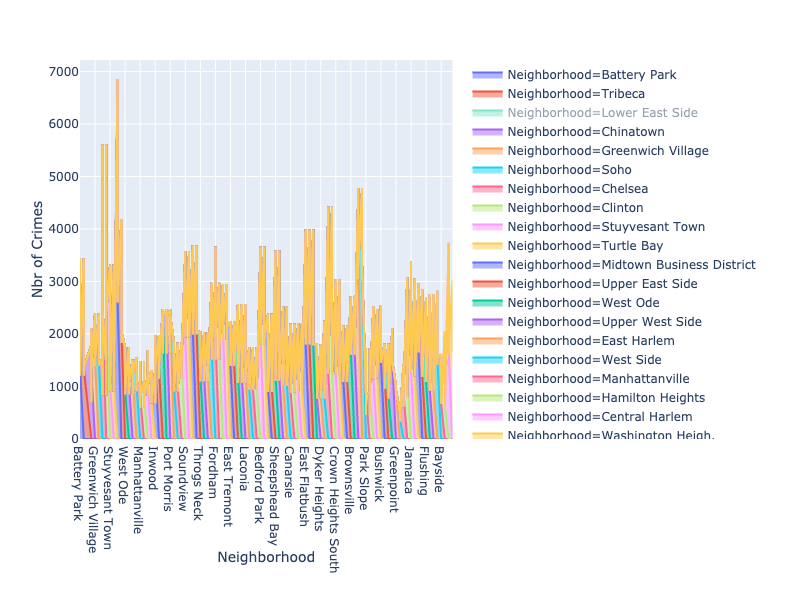

In [44]:
px.area(
    crime_results_slice,
    x="Neighborhood",
    y="Nbr of Crimes",
    color="Neighborhood",
    line_group="Neighborhood",
)

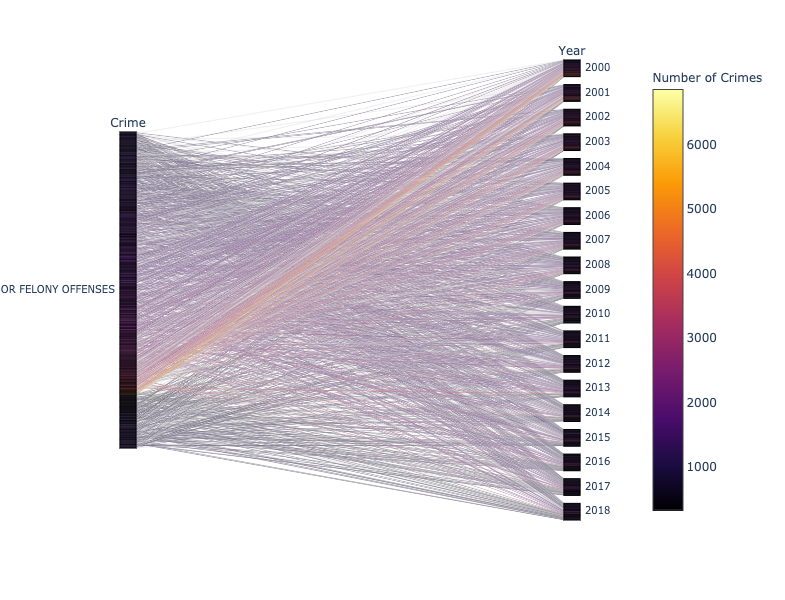

In [45]:
px.parallel_categories(
   crime_results_slice,
   dimensions=["Crime","Year","Nbr of Crimes","Neighborhood",],
   color="Nbr of Crimes",
   color_continuous_scale=px.colors.sequential.Inferno,
   labels={
       "Crime": "Crime",
       "Year": "Year",
       "Nbr of Crimes":"Number of Crimes",
       "neighborhood": "Neighborhood"       
   },
)

In [36]:
def neighborhood_stats(Neighborhood):
        mttn_slice = mttn_neigh_sales[mttn_neigh_sales['NEIGHBORHOOD'].isin([Neighborhood])]
        pct_change = mttn_slice['SALE PRICE'].pct_change()
        avg_pct_change = pct_change.mean()
        stdev = pct_change.std()
        return [avg_pct_change , stdev]

In [48]:
def cumulative_plot(Neighborhood):
    neigh_slice = crime_results_slice[crime_results_slice['NEIGHBORHOOD'].isin([Neighborhood])]
    neigh_slice.set_index('Year', inplace=True)
    cum_fcn = neigh_slice['Initial_Cost'].cumsum()
    return cum_fcn.hvplot.line()
interact(cumulative_plot,
Neighborhood=all_neighborhoods)

NameError: name 'all_neighborhoods' is not defined

In [49]:
def cumulative_dev_stats(Neighborhood):
    neigh_slice = crime_results_slice[crime_results_slice['NEIGHBORHOOD'].isin([Neighborhood])]
    neigh_slice.set_index('Year', inplace=True)
    cum_fcn = neigh_slice['Initial_Cost'].cumsum()
    returns = cum_fcn.pct_change()
    avg_pct_change = round(returns.mean(),3)
    pct_change_3yr = round(returns[-3:].mean(),3)
    comparison_3yr = round(pct_change_3yr - avg_pct_change,3)
    pct_change_5yr = round(returns[-5:].mean(),3)
    comparison_5yr = round(pct_change_5yr - avg_pct_change,3)
    return [avg_pct_change, pct_change_3yr, comparison_3yr, pct_change_5yr, comparison_5yr]
Collapse



NameError: name 'Collapse' is not defined

In [40]:
development_stats={}
for Neighborhood in all_neighborhoods:
    development_stats[Neighborhood]=cumulative_dev_stats(Neighborhood)


NameError: name 'all_neighborhoods' is not defined